# **Estudo Dirigido: PSO**
Implementando o Algoritmo Enxame de Partículas (PSO) para o problema do Caixeiro Viajante (TSP)

**Parâmetros do PSO:**

1. Número de Partículas (num_particles): O número de partículas no enxame. Cada partícula representa uma solução candidata no espaço de busca.

2. Número de Iterações (num_iterations): O número de vezes que o algoritmo irá iterar sobre o enxame. Mais iterações geralmente aumentam a chance de encontrar uma boa solução, mas também aumentam o tempo de execução.

3. Limites do Espaço de Busca (bounds): Define os limites do espaço de busca para cada dimensão do problema. Este parâmetro ajuda a restringir as soluções possíveis dentro de um intervalo específico.

4. Peso de Inércia (inertia_weight): Controla a influência da velocidade anterior da partícula na atualização da sua posição. Um valor maior de inércia pode ajudar na exploração do espaço de busca, enquanto um valor menor pode ajudar na explotação.

5. Parâmetro c1 (c1) e Parâmetro c2 (c2): São fatores de aprendizagem que controlam a influência das melhores posições pessoais e globais na atualização da velocidade das partículas. O parâmetro c1 controla a influência da melhor posição pessoal, enquanto o parâmetro c2 controla a influência da melhor posição global.


In [421]:
# Primeiro, instale as bibliotecas necessárias
!pip install matplotlib
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [422]:
# 1. Importar bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt

In [423]:
# Definir a função de custo (fitness) para o TSP
def tsp_fitness(path, distances):
    cost = 0
    for i in range(len(path) - 1):
        cost += distances[path[i]][path[i + 1]]
    # Adicionar o custo do retorno à cidade inicial
    cost += distances[path[-1]][path[0]]
    return cost

In [424]:
# Definir a classe Particle para representar uma solução do TSP:
class Particle:
    def __init__(self, num_nodes):
        self.path = np.random.permutation(num_nodes)
        self.velocity = 2
        self.best_path = self.path.copy()
        
    def update_path(self, global_best_path, inertia_weight, c1, c2):
        self.updated_velocity(global_best_path, inertia_weight, c1, c2)

        self.velocity = np.clip(self.velocity, -1 * len(self.path), len(self.path))

        self.path += self.velocity.astype(int)

        self.path = np.clip(self.path, 0, len(self.path) - 1)

    def updated_velocity(self, global_best_path, inertia_weight, c1, c2):
        self.velocity = inertia_weight * self.velocity + \
                        c1 * np.random.rand() * (self.best_path - self.path) + \
                        c2 * np.random.rand() * (global_best_path - self.path)

In [425]:
# Definir a função PSO para o TSP:
def pso_tsp(distances, num_particles, num_iterations, inertia_weight, c1, c2):
    num_nodes = len(distances)
    global_best_path = None
    global_best_cost = float('inf')
    best_costs = []

    # Inicializar partículas
    particles = [Particle(num_nodes) for _ in range(num_particles)]

    for _ in range(num_iterations):
        # Avaliar o custo de cada partícula
        costs = [tsp_fitness(particle.path, distances) for particle in particles]

        # Atualizar a melhor solução global
        min_cost_idx = np.argmin(costs)
        if costs[min_cost_idx] < global_best_cost:
            global_best_path = particles[min_cost_idx].path.copy()
            global_best_cost = costs[min_cost_idx]
        best_costs.append(global_best_cost)

        # Atualizar a posição de cada partícula
        for particle in particles:
            particle.update_path(global_best_path, inertia_weight, c1, c2)

    return global_best_path, global_best_cost, best_costs

In [426]:
# Definir os dados do problema e executar o algoritmo PSO para o TSP:

# Matriz de distâncias entre as cidades (exemplo)
distances = np.array([[0, 10, 15, 20],
                      [10, 0, 35, 25],
                      [15, 35, 0, 30],
                      [20, 25, 30, 0]])

num_particles = 30
num_iterations = 100
inertia_weight = 0.7
c1 = 1.5 # Cognitive coefficient
c2 = 1.5 # Social coefficient

best_path, best_cost, best_costs_history = pso_tsp(distances, num_particles, num_iterations, inertia_weight, c1, c2)

Número de partículas: 30
Número de interações: 100
Peso da inércia: 0.7
Parâmetro cognitivo: 1.5
Parâmetro social: 1.5


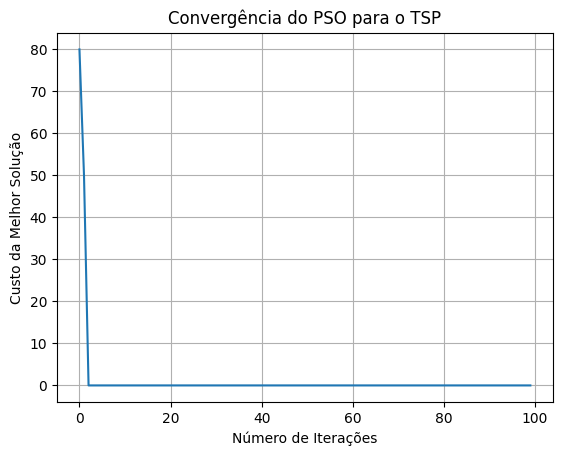

Melhor rota encontrada: [3 3 3 3]
Custo da melhor rota: 0


In [427]:
# Visualizar parâmetros para essa rodada:
print(f"Número de partículas: {num_particles}")
print(f"Número de interações: {num_iterations}")
print(f"Peso da inércia: {inertia_weight}")
print(f"Parâmetro cognitivo: {c1}")
print(f"Parâmetro social: {c2}")

# Visualizar a convergência do PSO para o TSP:

# Plot do custo da melhor solução encontrada ao longo das iterações
plt.plot(best_costs_history)
plt.xlabel('Número de Iterações')
plt.ylabel('Custo da Melhor Solução')
plt.title('Convergência do PSO para o TSP')
plt.grid(True)
plt.show()

print("Melhor rota encontrada:", best_path)
print("Custo da melhor rota:", best_cost)

# **Atividade:  Explorando Parâmetros do PSO**

Vamos realizar algumas alterações no códido acima para entender o comportamento do algoritmo. Documente os resultados em um doc ou pdf. Mostre o print e dê uma breve explicação do que ocorreu em cada etapa.

1. Número de Partículas (num_particles): Varie o número de partículas no enxame e observe como isso afeta a capacidade do algoritmo de explorar e encontrar o ótimo global.

2. Peso de Inércia (inertia_weight): Modifique o peso de inércia e analise como isso influencia a velocidade de convergência do algoritmo e sua capacidade de escapar de mínimos locais.

3. Parâmetro c1 (c1): Altere o parâmetro c1, que controla a influência da melhor posição pessoal na atualização da velocidade das partículas, e observe como isso afeta a exploração e a explotação do espaço de busca.

4. Parâmetro c2 (c2): Modifique o parâmetro c2, que controla a influência da melhor posição global na atualização da velocidade das partículas, e analise como isso afeta a capacidade do algoritmo de convergir para o ótimo global.

5. Limites do Espaço de Busca (bounds): Altere os limites do espaço de busca e observe como isso afeta o comportamento das partículas e a qualidade da solução encontrada.